# Intro to Data Science @ SzISz Part VI.
## Clustering

### Table of contents
- <a href="#What-is-Clustering?">Clustering Theory</a>
- <a href="#K-Means">K-Means</a>
- <a href="#DBSCAN">DBSCAN</a>
- <a href="#Hierarchical-Clustering">Hierarchical Clustering</a>
- <a href="#Spectral-Clustering">Spectral Clustering</a>
- <a href="#Gaussian-Mixture-Models">GMM</a>
- <a href="#Cluster-Validation">Cluster Validation</a>
    

## What is Clustering?
Clustering is an <a href="http://scikit-learn.org/stable/unsupervised_learning.html">unsupervised machine learning</a> problem. _"Unsupervised learning is the machine learning task of inferring a function to describe hidden structure from unlabeled data. Since the examples given to the learner are unlabeled, there is no error or reward signal to evaluate a potential solution."_ from: <a href="https://en.wikipedia.org/wiki/Unsupervised_learning">Wiki</a> 

_"Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters)."_ from: <a href="https://en.wikipedia.org/wiki/Cluster_analysis">Wiki</a>


## Why is it important?
Often the data does not contain target variables so one must find the hidden structure in the data first in order to achieve his/her goals. In case of recommender systems, it is a common technique to group the similar items together. In some cases the task itself is to find similar/connected/related items in the data. Like in image processing, Social network analysis, medical analysis, or it can be used to find the anomalies in the data.

## Tools
- K-Means
- Affinity propagation
- Mean-shift
- Spectral clustering
- Ward hierarchical clustering
- Agglomerative clustering
- DBSCAN
- Gaussian mixtures
- Birch
- Support Vector Clustering
- etc.

In [45]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [47]:
n_clusters = 3
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=42)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=42)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)
no_structure = np.random.rand(n_samples, 2), None

datasets = {
    'noisy_circles': noisy_circles,
    'noisy_moons': noisy_moons,
    'blobs': blobs,
    'no_structure': no_structure
}

colors = np.array([x for x in 'bgrcmyk'*20])

In [48]:
def cluster_datasets(model, preprocess=None, **params):
    model = model(**params)
    results = {}
    Xs = {}
    for problem, dataset in datasets.iteritems():
        X, y = dataset
        if preprocess:
            X = preprocess.fit_transform(X, y)
        Xs[problem] = X
        model.fit(X)
        if hasattr(model, 'labels_'):
            results[problem] = model.labels_.astype(np.int)
        else:
            results[problem] = model.predict(X)
    return model, Xs, results

In [49]:
def plot(Xs, results):
    plot_num = 1
    plt.figure(figsize=(len(datasets) * 2 + 3, 9.5))
    for problem, X in Xs.iteritems():
        plt.subplot(1, len(datasets), plot_num)
        plt.scatter(X[:, 0], X[:, 1], color=colors[results[problem]].tolist())
        plot_num += 1

## K-Means

In [37]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

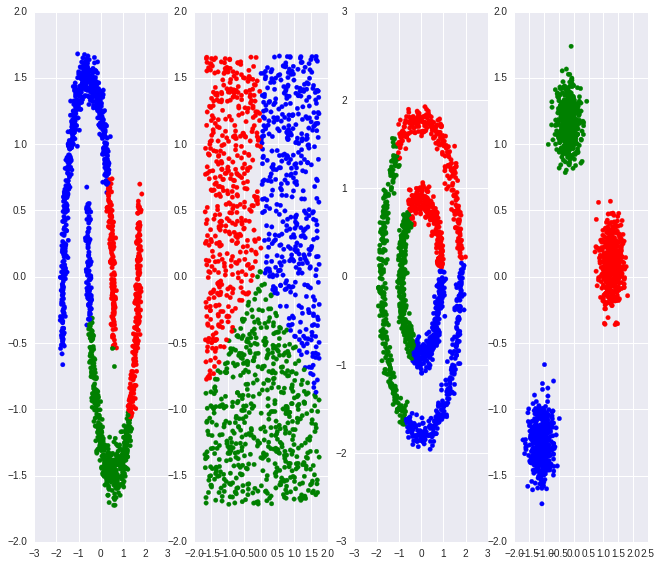

In [40]:
model, Xs, results = cluster_datasets(
    KMeans,
    preprocess=StandardScaler(),
    n_clusters=3,
    random_state=42
)
plot(Xs, results)

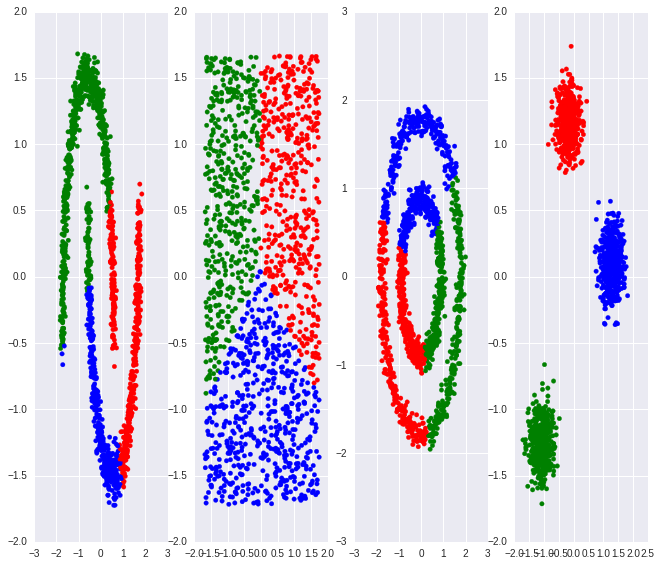

In [39]:
model, Xs, results = cluster_datasets(
    MiniBatchKMeans,
    preprocess=StandardScaler(),
    n_clusters=3,
    random_state=42
)
plot(Xs, results)

## DBSCAN

In [50]:
from sklearn.cluster import DBSCAN

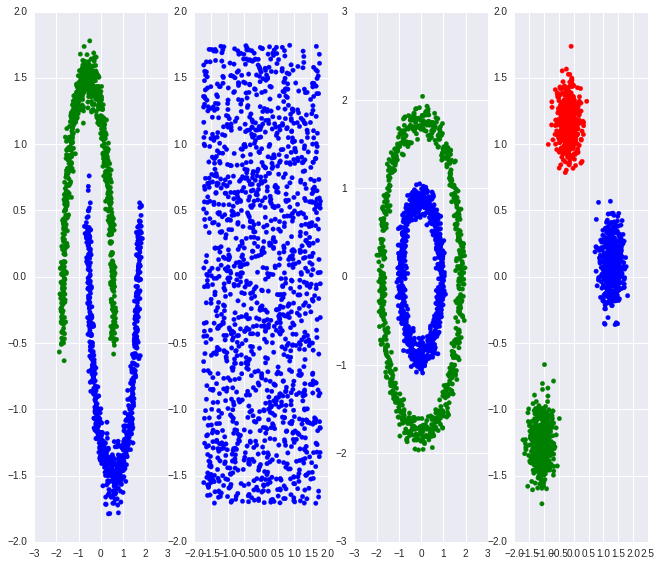

In [55]:
model, Xs, results = cluster_datasets(
    DBSCAN,
    preprocess=StandardScaler(),
    eps=0.3,
    min_samples=3
)
plot(Xs, results)

## Hierarchical Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AgglomerativeClustering()

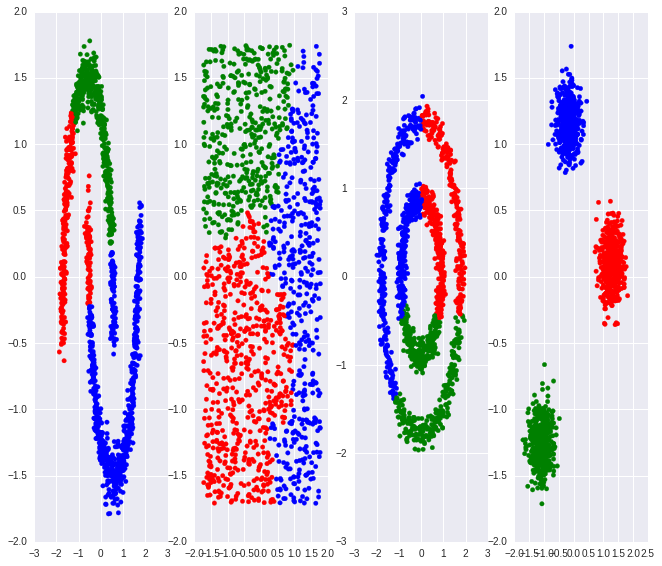

In [63]:
model, Xs, results = cluster_datasets(
    AgglomerativeClustering,
    preprocess=StandardScaler(),
    n_clusters=3,
    linkage='complete'
)
plot(Xs, results)

In [65]:
from sklearn.neighbors import kneighbors_graph

In [67]:
def ward_datasets(**params):
    results = {}
    Xs = {}
    models = {}
    for problem, dataset in datasets.iteritems():
        X, y = dataset
        X = StandardScaler().fit_transform(X, y)
        Xs[problem] = X
        connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
        connectivity = 0.5 * (connectivity + connectivity.T)
        model = AgglomerativeClustering(connectivity=connectivity, **params)
        model.fit(X)
        results[problem] = model.labels_.astype(np.int)
        models[problem] = model
    return models, Xs, results

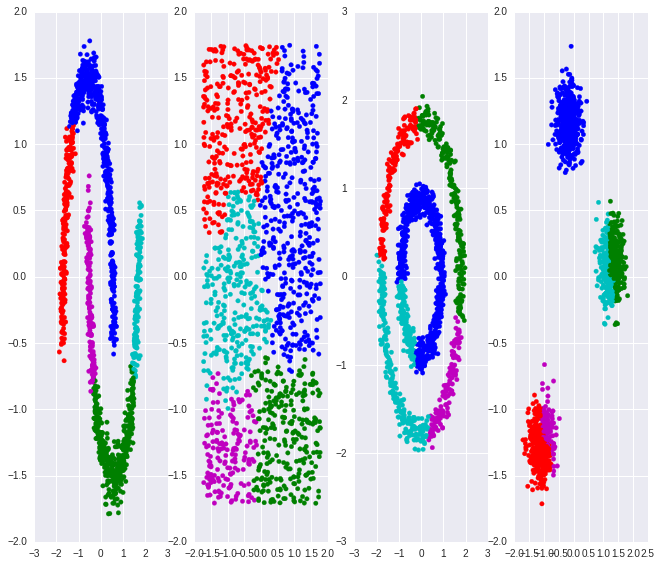

In [71]:
models, Xs, results = ward_datasets(
    n_clusters=5,
)
plot(Xs, results)

## Spectral Clustering

In [72]:
from sklearn.cluster import SpectralClustering

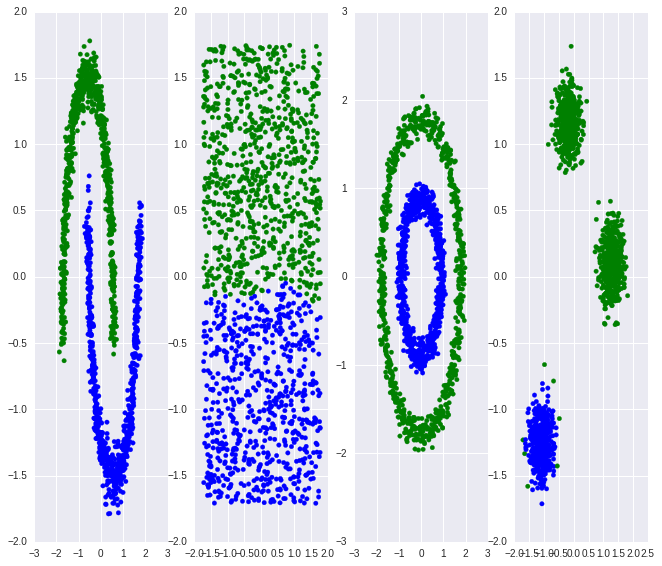

In [91]:
model, Xs, results = cluster_datasets(
    SpectralClustering,
    preprocess=StandardScaler(),
    n_clusters=2,
    gamma=1e1,
    random_state=42
)
plot(Xs, results)

## Gaussian Mixture Models

In [78]:
from sklearn.mixture import GMM

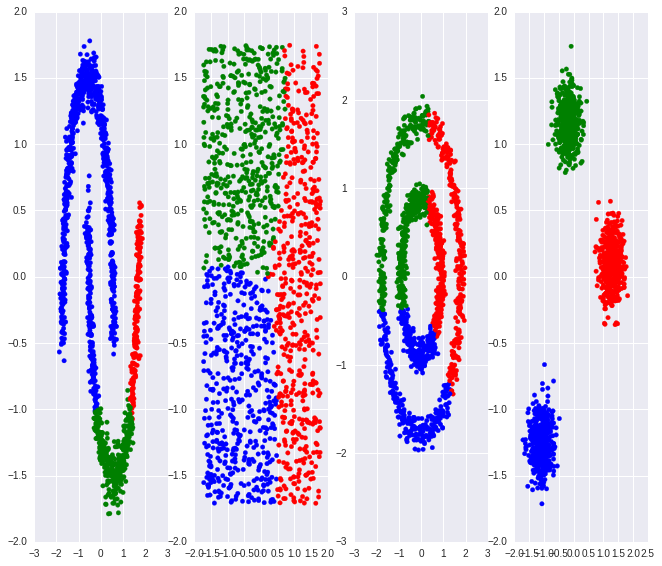

In [89]:
model, Xs, results = cluster_datasets(
    GMM,
    preprocess=StandardScaler(),
    n_components=3,
    random_state=42
)
plot(Xs, results)

## Cluster Validation

In [87]:
from sklearn.metrics import silhouette_score

In [92]:
for problem in datasets.keys():
    print problem, silhouette_score(Xs[problem], results[problem], random_state=42)

noisy_moons 0.393532339144
no_structure 0.353101008728
noisy_circles 0.112708030796
blobs 0.681885506471
